# Inference Keras

This notebook is used to evaluate the trained Keras model 

In [1]:
import pandas as pd
import numpy as np
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from data_generator import DataGenerator
from keras.models import load_model
from helper import get_index, plot_confusion_matrix
import matplotlib.pyplot as plt

/opt/miniconda/envs/py3/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)
/opt/miniconda/envs/py3/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)
/opt/miniconda/envs/py3/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)
/opt/miniconda/envs/py3/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)
Using TensorFlow backend.
/opt/miniconda/envs/py3/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: compiletime version 3.5 of module 'tensorflow.python.framework.fast_tensor_util' does not match runtime version 3.6
  retur

## load test data

In [2]:
df_test = pd.read_csv('../data/csv_files/test_data.csv')
n_test_data = len(df_test)
classes = ['Cat', 'Dog']

print('test data loaded!')
print('test dataset: %s' %n_test_data)

test data loaded!
test dataset: 2495


## data generator

In [3]:
generator_batch_size = 16

test_gen = DataGenerator(df=df_test, 
                         short_edge_min=256, 
                         short_edge_max=384, 
                         crop_mode='center_crop', 
                         target_size=(224,224),
                         batch_size=generator_batch_size,
                         x_col='image_path',
                         y_col='ground_truth', 
                        shuffle=False)

test_generator = test_gen.data_generator()

## load model

In [4]:
# Load the trained model
model = load_model('../models/densenet121_final.h5')

print('done!\n')

done!



## predict data

In [5]:
print("predicting test data...")
pred_array = model.predict_generator(generator=test_generator, steps=n_test_data/generator_batch_size, verbose=1)

predicting test data...
135/155 [========================>.....] - ETA: 4s

/home/ubuntu/.local/lib/python3.6/site-packages/PIL/TiffImagePlugin.py:763: UserWarning: Possibly corrupt EXIF data.  Expecting to read 80000 bytes but only got 0. Skipping tag 64640
  " Skipping tag %s" % (size, len(data), tag))
/home/ubuntu/.local/lib/python3.6/site-packages/PIL/TiffImagePlugin.py:763: UserWarning: Possibly corrupt EXIF data.  Expecting to read 65536 bytes but only got 0. Skipping tag 3
  " Skipping tag %s" % (size, len(data), tag))
/home/ubuntu/.local/lib/python3.6/site-packages/PIL/TiffImagePlugin.py:763: UserWarning: Possibly corrupt EXIF data.  Expecting to read 307363840 bytes but only got 0. Skipping tag 5
  " Skipping tag %s" % (size, len(data), tag))
/home/ubuntu/.local/lib/python3.6/site-packages/PIL/TiffImagePlugin.py:763: UserWarning: Possibly corrupt EXIF data.  Expecting to read 307888128 bytes but only got 0. Skipping tag 5
  " Skipping tag %s" % (size, len(data), tag))
/home/ubuntu/.local/lib/python3.6/site-packages/PIL/TiffImagePlugin.py:763: UserWarn

156/155 [==============================] - 35s 225ms/step


In [6]:
# get predected list
pred_labels = np.argmax(pred_array, axis=1)
pred_labels = pred_labels.tolist()
print(len(pred_labels))

2496


## read test data ground truth

In [7]:
'''read ground truth label'''    
df_gt = df_test['ground_truth'].apply(lambda row: get_index(row, classes))
df_gt = df_gt.to_frame().reset_index()
gt_labels = df_gt['ground_truth'].values.tolist()
print(len(gt_labels))

2495


## confusion matrix

[[1204   12]
 [  18 1261]]
Classification accuracy: 98.80%



Confusion matrix, without normalization


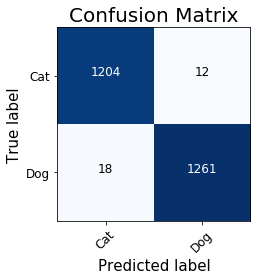

In [8]:
cm = confusion_matrix(gt_labels[:2495], pred_labels[:2495])
print(cm)

print('Classification accuracy: %.2f%%\n' % (accuracy_score(gt_labels[:2495], pred_labels[:2495])*100.0))
print('\n')

# plt.figure(figsize=(15, 10))
plot_confusion_matrix(cm, classes, normalize=False, title='Confusion Matrix')